In [1]:
import os
import cv2
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
MB_PATH = 'E:/dataset/completed/masked_background/'
MK_PATH = 'E:/dataset/completed/mask/'

OUT_NB_PATH = 'E:/dataset/completed/noisy_background/'

In [3]:
REF_W, REF_H = 1024, 768

In [4]:
mask_list = sorted(os.listdir(MK_PATH))
masked_background_list = sorted(os.listdir(MB_PATH))

In [5]:
for i in tqdm(range(len(mask_list)), desc = 'Adding Noise...'):
    file_name = mask_list[i][:-9]
    mask = cv2.imread(MK_PATH + mask_list[i]).astype(np.uint8)
    masked_background = cv2.imread(MB_PATH + masked_background_list[i]).astype(np.uint8)
    
    noise = (np.random.rand(REF_H, REF_W, 3) * 255).astype(np.uint8)
    
    noise_mask = mask * noise
    replace_idx = np.where(noise_mask != 0)
    
    masked_background[replace_idx] = 0
    noisy_background = masked_background + noise_mask
    
    cv2.imwrite(OUT_NB_PATH + file_name + '_noisybackground.png', noisy_background)

Adding Noise...:   0%|          | 0/1253 [00:00<?, ?it/s]

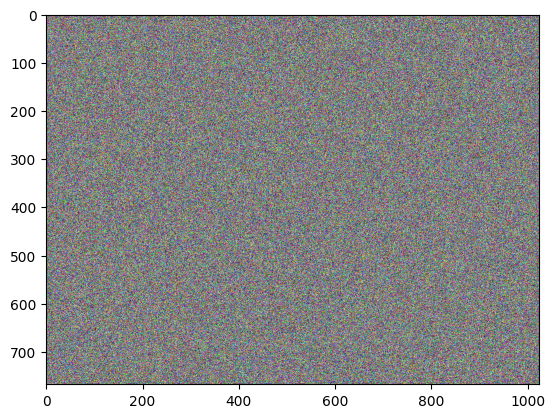

In [6]:
noise = (np.random.rand(REF_H, REF_W, 3) * 255).astype(np.uint8)
plt.imshow(noise)

In [7]:
noise.max(), noise.min(), noise.mean()

(254, 0, 127.05309210883246)